In [1]:
import pandas as pd

In [2]:
xbox = pd.read_csv("./datasets/video_games/XboxOne_GameSales.csv")
ps4 = pd.read_csv("./datasets/video_games/PS4_GamesSales.csv")
sales = pd.read_csv("./datasets/video_games/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
xbox.Year = pd.to_numeric(xbox.Year, errors="coerce")
ps4.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global', 'Unnamed: 9'],
      dtype='object')

In [4]:
sales["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
sales.sample(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
15375,Final Approach 2: 1st Priority,PS2,2008.0,Adventure,Princess Soft,0.00,0.0,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
2105,WWE SmackDown vs Raw 2008,Wii,2007.0,Fighting,THQ,0.38,0.5,0.00,0.11,0.98,59.0,13.0,5.9,18.0,Yuke's,T
7319,College Hoops 2K7,X360,2006.0,Sports,Take-Two Interactive,0.20,0.0,0.00,0.02,0.21,82.0,22.0,8.2,12.0,2K Sports,E


In [7]:
ps4.sample()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Unnamed: 9
316,Elex,2017,Role-Playing,THQ Nordic,0.03,0.16,0.0,0.04,0.23,NaN


### Problemas

1. Como podemos definir agora, entre PS4 e XBox quem teve maior venda na Europa no ano de 2018?
2. Qual Publisher teve maior venda Global ao decorrer dos anos?
3. Como fazer o comparativo de notas (Rating) baseado nas Plataformas?
4. Como gerar um gráfico das notas de uma plataforma?

1.Questão do maior número de vendas

In [42]:
sales_xbox = xbox[['Game','Publisher','Year','Europe']].loc[xbox['Year'] == '2017']
sales_ps4 = ps4[['Game','Publisher','Year','Europe']].loc[ps4['Year'] == '2017']

if sales_xbox['Europe'].sum() > sales_ps4['Europe'].sum():
    
    print(f"Xbox foi o que vendeu mais no ano 2018: " , round(sales_xbox['Europe'].sum(),3))
else:
    print(f"Ps4 foi o que vendeu mais no ano 2018 :" , round(sales_ps4['Europe'].sum(),3))


Ps4 foi o que vendeu mais no ano 2018 : 57.18


3.Montagem do maior número de vendas, de acordo com o publisher

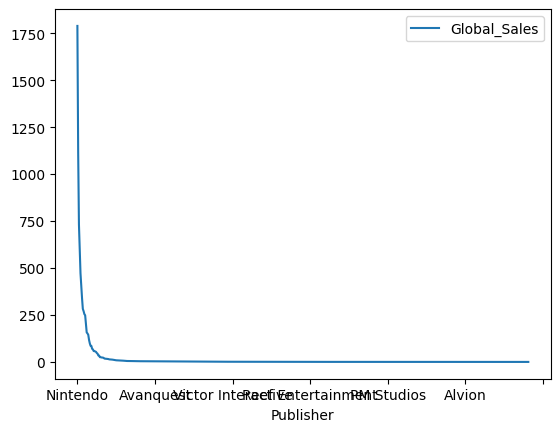

In [5]:
publisher_sales = sales[['Publisher','Global_Sales']]

most_publisher = publisher_sales.groupby('Publisher').sum()
most_publisher = most_publisher.sort_values(by ='Global_Sales', ascending=False).plot()

4.Montagem de gráfico do maior score

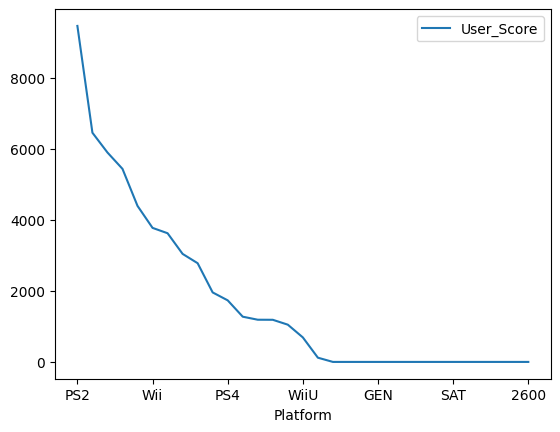

In [8]:
platafomrs = sales[[ 'Platform','User_Score']]
rating_plat = platafomrs.groupby('Platform').sum()
most_rating = rating_plat.sort_values(by = 'User_Score',ascending= False).plot()
